<a href="https://colab.research.google.com/github/adityasahu88/DL_PROJECTS/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
mnist =tf.keras.datasets.mnist
(X_train,y_train),(X_test,y_test) =mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


labels :5


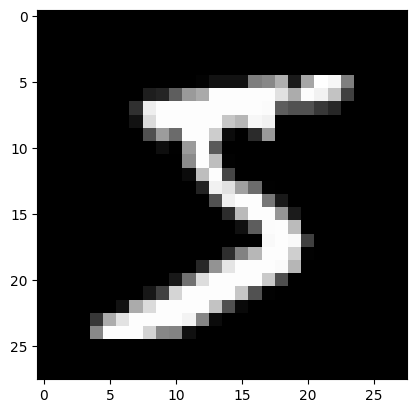

In [3]:
# Check the images
X_train[0]
plt.imshow(X_train[0],cmap ='gray')
print(f"labels :{y_train[0]}")
plt.show()


In [4]:
# Shape of Datasets
X_train.shape
# This represents 60k images 28 width with 28 images

(60000, 28, 28)

In [5]:
# Shape of y_train
y_train.shape  # Represents 60k labels

(60000,)

In [6]:
# shape of X_test
X_test.shape
# This represents 10k images 28 width with 28 images

(10000, 28, 28)

In [7]:
# shape of y_test
y_test.shape
# Represents 10k labels

(10000,)

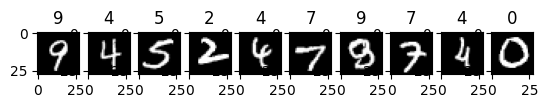

In [8]:
random_list=[]
for i in range(10):
  random_list.append(np.random.randint(0,X_train.shape[0]))
for e,i  in enumerate(random_list):
  plt.subplot(1,10,e+1)
  plt.imshow(X_train[i],cmap ='gray')
  plt.title(f"{y_train[i]}")
plt.show()


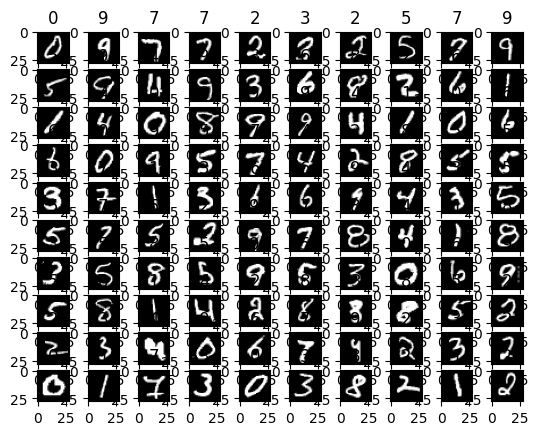

In [9]:
# display 10*10 images for each digit
random_list=[]
for i in range(10):
  for j in range(10):
    random_list.append(np.random.randint(0,X_train.shape[0]))

for e,i  in enumerate(random_list):
  plt.subplot(10,10,e+1)
  plt.imshow(X_train[i],cmap ='gray')
  plt.title(f"{y_train[i]}")
plt.show()


In [10]:
print(f" x max : {X_train.max()}")
print(f" x min : {X_train.min()}")

 x max : 255
 x min : 0


In [11]:
#As x ranges between 0 and 255 ,hence it is required to  make it normalize
X_train=X_train/255.0

In [12]:
# convert the target lebels into one hot encoding
y_train_v2 =tf.keras.utils.to_categorical(y_train,num_classes=10)


In [13]:
#check the shape of y_train and y_train_v2
print(f"shape of y train  : {y_train.shape}")
print(f"shape of y train v2  : {y_train_v2.shape}")

shape of y train  : (60000,)
shape of y train v2  : (60000, 10)


In [16]:

# Create the Model using SGD
model = tf.keras.models.Sequential()
# Create the input layer
model.add(tf.keras.layers.Input((28,28),name ="inputlayer"))

# Convert the input layer to flatten layer
model.add(tf.keras.layers.Flatten(name ="flatten_layer"))
# Create the 1st Hidden layer
model.add(tf.keras.layers.Dense(512,activation=tf.keras.activations.relu,name ="HiddenLayer1"))

# Create the 2nd Hidden layer
model.add(tf.keras.layers.Dense(128,activation=tf.keras.activations.relu,name ="HiddenLayer2"))
# Create the 3rd Hidden layer
model.add(tf.keras.layers.Dense(64,activation=tf.keras.activations.relu,name ="HiddenLayer3"))
# Create the 4th Hidden layer
model.add(tf.keras.layers.Dense(32,activation=tf.keras.activations.relu,name ="HiddenLayer4"))
# Create the 5th Hidden layer
model.add(tf.keras.layers.Dense(16,activation=tf.keras.activations.relu,name ="HiddenLayer5"))
# Create the output layes
model.add(tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax,name ="output_layer"))
model.summary()
model.compile(optimizer =tf.keras.optimizers.SGD(),loss=tf.keras.losses.categorical_crossentropy,metrics=['acc'])
model.fit(x=X_train,y=y_train_v2,validation_split = 0.1,epochs=20,batch_size=64)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_layer (Flatten)              │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ HiddenLayer1 (Dense)                 │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ HiddenLayer2 (Dense)                 │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ HiddenLayer3 (Dense)                 │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ HiddenLayer4 (Dense)                 │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ HiddenLayer5 (Dense)                 │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 478,618 (1.83 MB)

 Trainable params: 478,618 (1.83 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - acc: 0.3822 - loss: 1.7686 - val_acc: 0.8717 - val_loss: 0.4390
Epoch 2/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - acc: 0.8746 - loss: 0.4377 - val_acc: 0.9247 - val_loss: 0.2694
Epoch 3/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - acc: 0.9180 - loss: 0.2948 - val_acc: 0.9457 - val_loss: 0.1874
Epoch 4/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - acc: 0.9347 - loss: 0.2244 - val_acc: 0.9585 - val_loss: 0.1527
Epoch 5/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - acc: 0.9470 - loss: 0.1831 - val_acc: 0.9610 - val_loss: 0.1379
Epoch 6/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - acc: 0.9525 - loss: 0.1583 - val_acc: 0.9632 - val_loss: 0.1368
Epoch 7/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - acc: 0.9614 - loss: 0.1326 - val_acc: 0.9658 - val_loss: 0.1185
Epoch 8/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - acc: 0.9656 - loss: 0.1181 - val_acc: 0.9718 - val_loss: 0.1050
Epoch 9/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - 

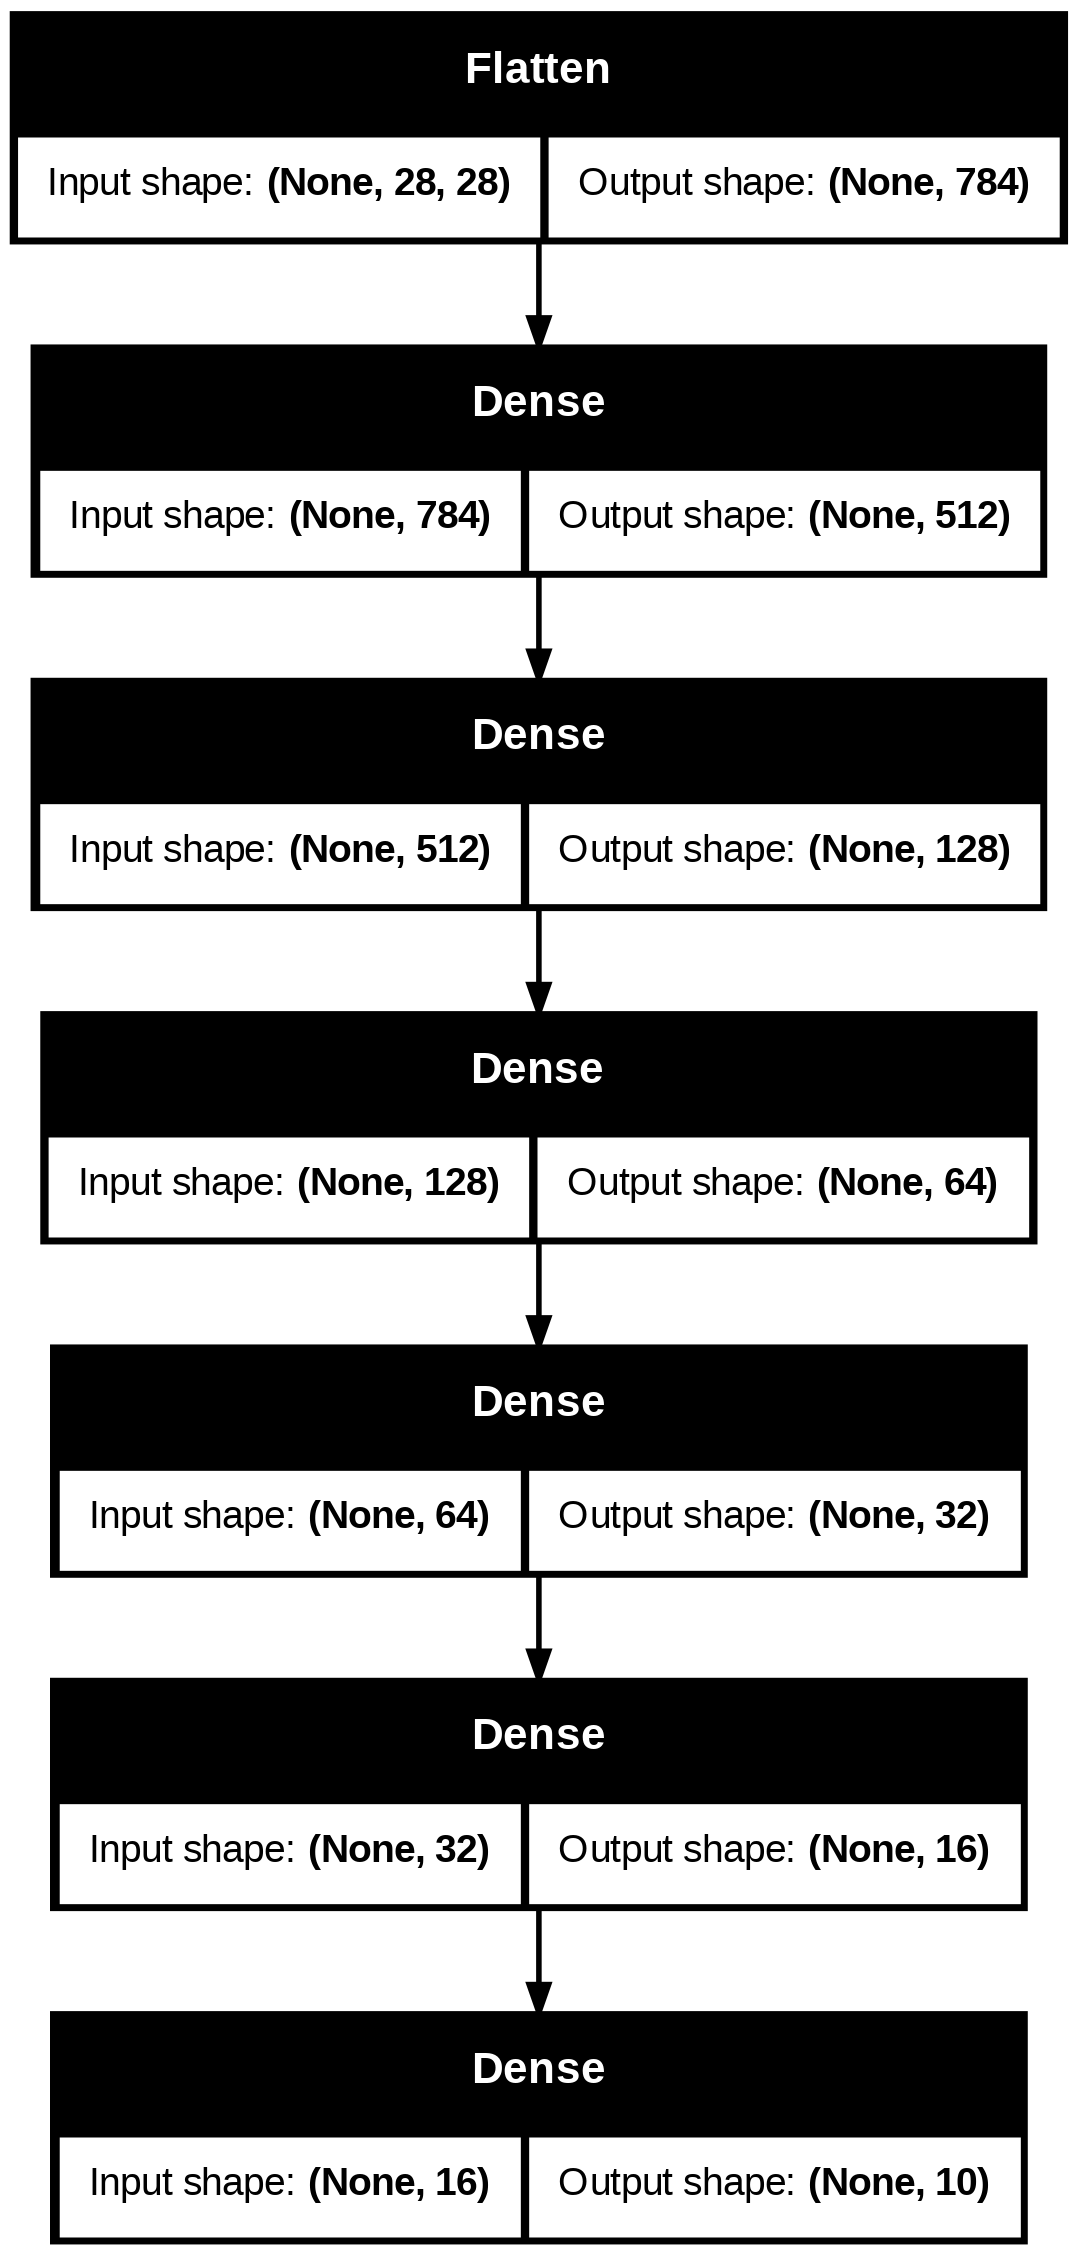

In [17]:
#To plot the Model
tf.keras.utils.plot_model(model,show_shapes=True)

In [18]:
# store the scores in a dataframe
scores =pd.DataFrame(model.history.history)
scores

,acc,loss,val_acc,val_loss
0,0.615389,1.208528,0.871667,0.439030
1,0.888074,0.392055,0.924667,0.269447
2,0.923407,0.270151,0.945667,0.187424
3,0.938574,0.212575,0.958500,0.152724
4,0.948593,0.175886,0.961000,0.137924
5,0.955852,0.150654,0.963167,0.136815
6,0.962296,0.129439,0.965833,0.118516
7,0.966593,0.113338,0.971833,0.105011
8,0.970074,0.101630,0.972500,0.098723
9,0.974519,0.089225,0.973333,0.092675


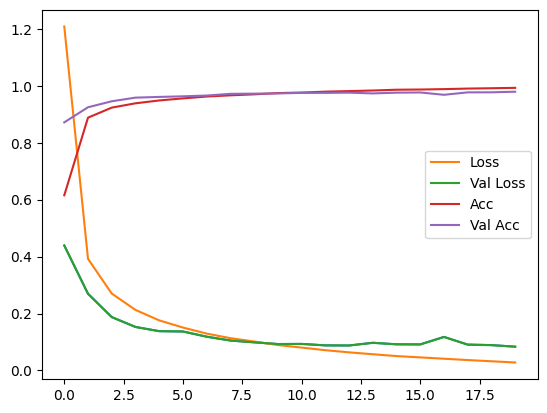

In [19]:
plt.plot(scores["val_loss"])
plt.plot(scores["loss"], label="Loss")
plt.plot(scores["val_loss"], label="Val Loss")
plt.plot(scores["acc"], label="Acc")
plt.plot(scores["val_acc"], label="Val Acc")
plt.legend()

In [20]:
# check for test images
model.input_shape # No of images,width of the image,Height of the image


(None, 28, 28)

In [21]:
# Before sending the image we should normalize the images for a single image
test_image =X_test[0]/255.0
test_image.shape

(28, 28)

In [22]:
# but our model expects  (None,28,28)
test_image =np.expand_dims(test_image,axis=0)
test_image.shape

(1, 28, 28)

In [23]:
# pass the image to the model
model.predict(test_image)
# here the model predicts the probabilty for each number

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


array([[6.8502834e-07, 1.9424606e-08, 6.5220620e-06, 1.2171239e-07,
        5.6420757e-10, 1.5743159e-12, 2.8869156e-14, 9.9998856e-01,
        2.2914334e-08, 4.1181111e-06]], dtype=float32)

In [24]:
# to find the greatest probabilty fro the list
np.argmax(model.predict(test_image))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


7

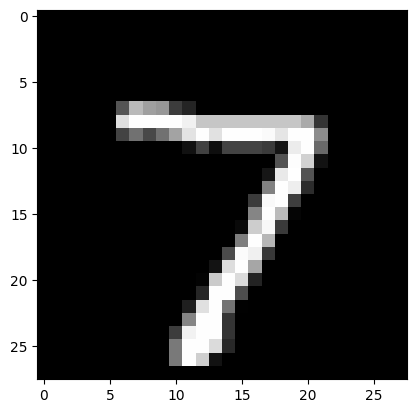

In [25]:
# lets see the image
plt.imshow(X_test[0],cmap ='gray')
plt.show()

In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
X_test_v2 =X_test/255.0
y_pred =np.argmax(model.predict(X_test_v2),axis=1)
y_pred

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([7, 2, 1, ..., 4, 5, 6])

In [30]:
# test the accuracy
print(f" the test accuracy is : {(y_test == y_pred).mean()}")

 the test accuracy is : 0.9742


In [31]:
accuracy_score(y_test, y_pred)

0.9742

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.97      0.97      0.97      1010
           4       0.97      0.98      0.97       982
           5       0.97      0.97      0.97       892
           6       0.98      0.97      0.97       958
           7       0.98      0.98      0.98      1028
           8       0.96      0.96      0.96       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

